### 🎯 Objetivo del Proyecto

Desarrollar un modelo de aprendizaje supervisado utilizando un **perceptrón (una sola neurona)** para la clasificación binaria sobre el **Pima Indians Diabetes Dataset**, aplicando **Programación Orientada a Objetos (POO)** y el **patrón de diseño Modelo-Vista-Controlador (MVC)**. El sistema será implementado en un entorno interactivo (`Jupyter Notebook`) con énfasis en la estandarización de datos, optimización de hiperparámetros, visualización de métricas y análisis de variables binarias.

---

### ⚙️ Requerimientos funcionales

1. **Estandarización de datos**: normalización con `StandardScaler` de `sklearn`.
2. **Relleno de datos faltantes**: estrategia `mean` usando `SimpleImputer`.
3. **División de datos**: entrenamiento (80%), prueba (15%) y demostracion (5%).
4. **Entrenamiento**: perceptrón con tasa de aprendizaje (`eta0`) y número de épocas (`max_iter`).
5. **Optimización automática**: búsqueda interna para mejores hiperparámetros.
6. **Visualización**: matriz de confusión, distribución de valores binarios, tabla real vs predicho.
7. **POO y MVC**: modelo, vista y controlador estructurados modularmente.

---

### 📈 Métricas a mostrar

- Precisión del modelo.
- Matriz de confusión.
- Porcentaje de variables binarias.
- Comparación de valores esperados vs. predichos.
- Mejor combinación de hiperparámetros.

---

### 💻 Formato de entrega

- Archivo Jupyter Notebook (`perceptron_pima_diabetes.ipynb`) autoejecutable.
- Dataset en CSV: `data/pima-indians-diabetes.csv`.
- Código modular, comentado y extensible.

---

### 🧪 Finalidad

Predecir si una persona **desarrollará diabetes tipo II** en los próximos años a partir de indicadores clínicos. El sistema actúa como herramienta preventiva para el ámbito médico.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer


In [ ]:
class ModeloPerceptron:
    """
    Clase ModeloPerceptron
    ----------------------
    Encapsula la lógica de carga, preprocesamiento, entrenamiento, predicción y evaluación
    del modelo Perceptrón para clasificación binaria sobre un dataset.

    Atributos:
    ----------
    data : DataFrame
        Datos cargados desde el archivo CSV.
    scaler : StandardScaler
        Objeto para normalizar los datos.
    X, y : ndarray
        Matriz de características y vector objetivo.
    X_train, X_test, X_val : ndarray
        Subconjuntos de datos para entrenamiento, prueba y validación.
    y_train, y_test, y_val : ndarray
        Etiquetas correspondientes a los subconjuntos.
    model : Perceptron
        Modelo de perceptrón de sklearn.

    Métodos:
    --------
    rellenar_datos():
        Rellena valores faltantes con la media.
    dividir_datos(train_size, test_size, val_size):
        Divide los datos en entrenamiento, prueba y validación.
    entrenar(eta, epocas):
        Entrena el modelo con los hiperparámetros dados.
    predecir(conjunto):
        Predice sobre el conjunto de prueba o validación.
    evaluar(y_true, y_pred):
        Calcula precisión y matriz de confusión.
    optimizar(tasas, epocas_list):
        Busca la mejor combinación de hiperparámetros.
    obtener_datos_normalizados():
        Devuelve los datos normalizados como DataFrame.
    """
    def __init__(self, ruta_csv):
        # Carga el dataset desde un archivo CSV.
        self.data = pd.read_csv(ruta_csv)
        
        # Limpieza de comillas simples en los datos (si existen)
        self.data = self.data.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)

        # Conversión de clase (etiqueta) a binaria: good = 1, bad = 0
        self.data['class'] = self.data['class'].map({'good': 1, 'bad': 0})

        # One-hot encoding para variables categóricas (si existen)
        self.data = pd.get_dummies(self.data, drop_first=True)

        self.scaler = StandardScaler()
        self.X = self.data.drop('class', axis=1).values
        self.y = self.data['class'].values
        self.X_train = self.X_test = self.X_val = None
        self.y_train = self.y_test = self.y_val = None
        self.model = None

    def rellenar_datos(self):
        """
        Rellena los valores faltantes de las columnas numéricas con la media de cada columna.
        """
        imputer = SimpleImputer(strategy='mean')
        self.X = imputer.fit_transform(self.X)

    def dividir_datos(self, train_size=0.8, test_size=0.15, val_size=0.05):
        """
        Divide los datos en tres conjuntos: entrenamiento, prueba y validación.
        train_size: proporción para entrenamiento (float)
        test_size: proporción para prueba (float)
        val_size: proporción para validación/demostración (float)
        """
        self.X = self.scaler.fit_transform(self.X)
        X_train, X_rest, y_train, y_rest = train_test_split(
            self.X, self.y, test_size=(1 - train_size), random_state=42
        )
        test_ratio = test_size / (test_size + val_size)
        X_test, X_val, y_test, y_val = train_test_split(
            X_rest, y_rest, test_size=(1 - test_ratio), random_state=42
        )
        self.X_train, self.X_test, self.X_val = X_train, X_test, X_val
        self.y_train, self.y_test, self.y_val = y_train, y_test, y_val

    def obtener_datos_normalizados(self):
        """
        Devuelve los datos normalizados como un DataFrame.
        """
        return pd.DataFrame(self.X, columns=self.data.drop('class', axis=1).columns)

    def entrenar(self, eta=0.01, epocas=1000):
        """
        Entrena el modelo Perceptrón usando los datos de entrenamiento.
        eta: tasa de aprendizaje (float)
        epocas: número de épocas (int)
        """
        self.model = Perceptron(eta0=eta, max_iter=epocas, random_state=42)
        self.model.fit(self.X_train, self.y_train)

    def predecir(self, conjunto='test'):
        """
        Realiza predicciones sobre el conjunto especificado ('test' o 'val').
        Retorna un array de predicciones.
        """
        if conjunto == 'test':
            return self.model.predict(self.X_test)
        elif conjunto == 'val':
            return self.model.predict(self.X_val)
        else:
            raise ValueError("conjunto debe ser 'test' o 'val'")

    def evaluar(self, y_true, y_pred):
        """
        Calcula la precisión y la matriz de confusión entre los valores reales y predichos.
        Retorna un diccionario con las métricas.
        """
        return {
            'accuracy': accuracy_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred)
        }

    def optimizar(self, tasas=[0.001, 0.01, 0.1], epocas_list=[100, 300, 500]):
        """
        Realiza una búsqueda de grilla (grid search) sobre las tasas de aprendizaje y épocas
        para encontrar la mejor combinación según la precisión en el conjunto de prueba.
        Retorna la mejor tasa, mejor número de épocas y la precisión alcanzada.
        """
        mejor_acc = 0
        mejor_eta = 0
        mejor_epoca = 0
        for eta in tasas:
            for ep in epocas_list:
                self.entrenar(eta, ep)
                y_pred = self.predecir('test')
                acc = accuracy_score(self.y_test, y_pred)
                if acc > mejor_acc:
                    mejor_acc = acc
                    mejor_eta = eta
                    mejor_epoca = ep
        return mejor_eta, mejor_epoca, mejor_acc


In [ ]:
class VistaResultados:
    """
    Clase VistaResultados
    ---------------------
    Encapsula la visualización y presentación de resultados del modelo.

    Métodos:
    --------
    mostrar_datos_normalizados(df_norm):
        Muestra los primeros 5 datos normalizados.
    mostrar_binarios(df):
        Muestra el porcentaje de valores binarios por columna.
    mostrar_matriz_confusion(matriz):
        Visualiza la matriz de confusión usando seaborn.
    mostrar_resultado_optimo(eta, ep, acc):
        Imprime la mejor tasa de aprendizaje, épocas y precisión.
    mostrar_comparacion(y_test, y_pred, nombre):
        Muestra una tabla de comparación entre valores esperados y predichos,
        y el porcentaje de aciertos.
    """
    def mostrar_datos_normalizados(self, df_norm):
        print("Primeros 5 datos normalizados:")
        display(df_norm.head())

    def mostrar_binarios(self, df):
        print("\nPorcentaje de valores binarios por columna:")
        for col in df.columns:
            uniques = df[col].unique()
            if len(uniques) == 2:
                porcentaje = (df[col].value_counts(normalize=True) * 100).round(2)
                print(f"{col}:")
                print(porcentaje.to_string())

    def mostrar_matriz_confusion(self, matriz):
        """
        Visualiza la matriz de confusión usando seaborn.
        """
        sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
        plt.title("Matriz de Confusión")
        plt.xlabel("Predicho")
        plt.ylabel("Real")
        plt.show()

    def mostrar_resultado_optimo(self, eta, ep, acc):
        """
        Imprime la mejor tasa de aprendizaje, número de épocas y precisión obtenida.
        """
        print(f"Mejor tasa de aprendizaje: {eta}")
        print(f"Mejor número de épocas: {ep}")
        print(f"Precisión: {acc:.2f}")

    def mostrar_comparacion(self, y_test, y_pred, nombre="prueba"):
        """
        Muestra una tabla de comparación entre los valores esperados y predichos,
        y el porcentaje de aciertos sobre el conjunto especificado.
        """
        df_comp = pd.DataFrame({
            'Esperado': y_test,
            'Predicho': y_pred
        })
        print(f"\nComparación entre valores esperados y predichos ({nombre}):")
        display(df_comp.head(10))

        aciertos = np.sum(y_test == y_pred)
        total = len(y_test)
        porcentaje_acierto = (aciertos / total) * 100
        print(f"\nPorcentaje de aciertos sobre datos de {nombre}: {porcentaje_acierto:.2f}%")


In [25]:
class ControladorPerceptron:
    """
    Clase ControladorPerceptron
    ---------------------------
    Orquesta el flujo entre el modelo y la vista, ejecutando el proceso completo:
    carga, preprocesamiento, entrenamiento, optimización, evaluación y visualización.

    Métodos:
    --------
    ejecutar():
        Ejecuta todo el flujo de trabajo del sistema.
    """
    def __init__(self, ruta_csv):
        self.modelo = ModeloPerceptron(ruta_csv)
        self.vista = VistaResultados()

    def ejecutar(self):
        """
        Ejecuta el flujo completo:
        - Preprocesamiento de datos
        - División en entrenamiento, prueba y validación
        - Optimización de hiperparámetros
        - Entrenamiento final
        - Evaluación y visualización de resultados
        """
        self.modelo.rellenar_datos()
        self.modelo.dividir_datos(train_size=0.8, test_size=0.15, val_size=0.05)
        df_norm = self.modelo.obtener_datos_normalizados()
        self.vista.mostrar_datos_normalizados(df_norm)
        self.vista.mostrar_binarios(self.modelo.data)

        mejor_eta, mejor_ep, mejor_acc = self.modelo.optimizar()
        self.vista.mostrar_resultado_optimo(mejor_eta, mejor_ep, mejor_acc)

        self.modelo.entrenar(mejor_eta, mejor_ep)
        # Prueba
        y_pred_test = self.modelo.predecir('test')
        resultados_test = self.modelo.evaluar(self.modelo.y_test, y_pred_test)
        self.vista.mostrar_matriz_confusion(resultados_test['confusion_matrix'])
        self.vista.mostrar_comparacion(self.modelo.y_test, y_pred_test, nombre="prueba")

        # Validación (demostración final)
        y_pred_val = self.modelo.predecir('val')
        resultados_val = self.modelo.evaluar(self.modelo.y_val, y_pred_val)
        print("\n--- Validación final (5% de los datos, demostración de funcionamiento) ---")
        self.vista.mostrar_matriz_confusion(resultados_val['confusion_matrix'])
        self.vista.mostrar_comparacion(self.modelo.y_val, y_pred_val, nombre="validación")


Primeros 5 datos normalizados:


C:\Users\lucas\AppData\Local\Temp\ipykernel_15876\1042641270.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.data = self.data.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.627770,-0.259299,-0.806328,...,1.595650,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,1.214598,0.196014
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,-0.614337,-0.259299,-0.806328,...,1.595650,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.614337,-0.259299,1.240190,...,1.595650,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0,-0.823318,0.196014
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1.627770,-0.259299,-0.806328,...,-0.626704,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1.627770,-0.259299,-0.806328,...,-0.626704,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318,0.196014



Porcentaje de valores binarios por columna:
num_dependents:
num_dependents
1    84.5
2    15.5
class:
class
1    70.0
0    30.0
checking_status_<0:
checking_status_<0
False    72.6
True     27.4
checking_status_>=200:
checking_status_>=200
False    93.7
True      6.3
checking_status_no checking:
checking_status_no checking
False    60.6
True     39.4
credit_history_critical/other existing credit:
credit_history_critical/other existing credit
False    70.7
True     29.3
credit_history_delayed previously:
credit_history_delayed previously
False    91.2
True      8.8
credit_history_existing paid:
credit_history_existing paid
True     53.0
False    47.0
credit_history_no credits/all paid:
credit_history_no credits/all paid
False    96.0
True      4.0
purpose_domestic appliance:
purpose_domestic appliance
False    98.8
True      1.2
purpose_education:
purpose_education
False    95.0
True      5.0
purpose_furniture/equipment:
purpose_furniture/equipment
False    81.9
True     18.1
purpose_n

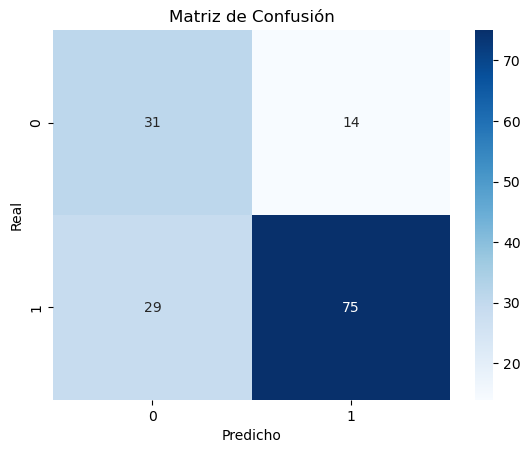


Comparación entre valores esperados y predichos (prueba):


,Esperado,Predicho
0,1,1
1,1,1
2,0,1
3,0,1
4,1,1
5,0,1
6,0,0
7,1,0
8,1,1
9,1,1



Porcentaje de aciertos sobre datos de prueba: 71.14%

--- Validación final (5% de los datos, demostración de funcionamiento) ---


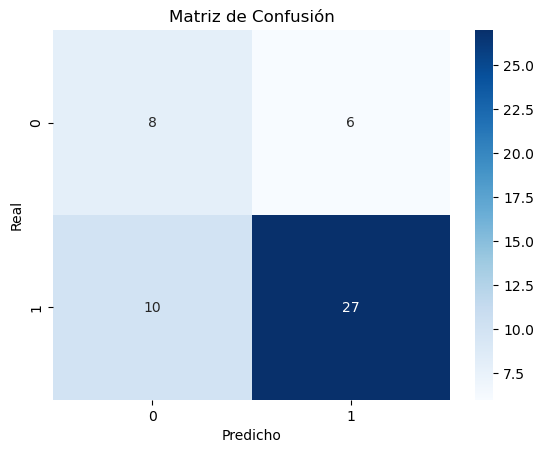


Comparación entre valores esperados y predichos (validación):


,Esperado,Predicho
0,1,1
1,0,1
2,1,1
3,1,0
4,1,1
5,1,1
6,0,1
7,1,1
8,1,1
9,1,1



Porcentaje de aciertos sobre datos de validación: 68.63%


In [27]:
controlador = ControladorPerceptron("data/credit-g.csv")
controlador.ejecutar()
